In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
raw_1 = pd.read_csv('Credit_card.csv')
raw_2 = pd.read_csv('Credit_card_label.csv')
raw_merge = pd.merge(raw_1 , raw_2 ,
                     on = 'Ind_ID',
                     how= 'inner')
raw_merge

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [3]:
raw_merge.describe().round(2)

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1548.00,1548.00,1525.00,1526.00,1548.00,1548.0,1548.00,1548.00,1548.00,1548.00,1548.00
mean,5078920.35,0.41,191399.33,-16040.34,59364.69,1.0,0.21,0.31,0.09,2.16,0.11
std,41717.59,0.78,113253.00,4229.50,137808.06,0.0,0.41,0.46,0.29,0.95,0.32
min,5008827.00,0.00,33750.00,-24946.00,-14887.00,1.0,0.00,0.00,0.00,1.00,0.00
25%,5045069.75,0.00,121500.00,-19553.00,-3174.50,1.0,0.00,0.00,0.00,2.00,0.00
50%,5078841.50,0.00,166500.00,-15661.50,-1565.00,1.0,0.00,0.00,0.00,2.00,0.00
75%,5115673.00,1.00,225000.00,-12417.00,-431.75,1.0,0.00,1.00,0.00,3.00,0.00
max,5150412.00,14.00,1575000.00,-7705.00,365243.00,1.0,1.00,1.00,1.00,15.00,1.00




1.    Missing values are present in Annual income and bithday count
2.   Some unnecessary coulumns are present such as mobile phone , phone,etc.



In [4]:
raw_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [5]:
print(raw_merge.isnull().sum())

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64


Type occupation column has high no. of Null values so it would be better to drop it,for other columns with null values imputation is better option

<Axes: >

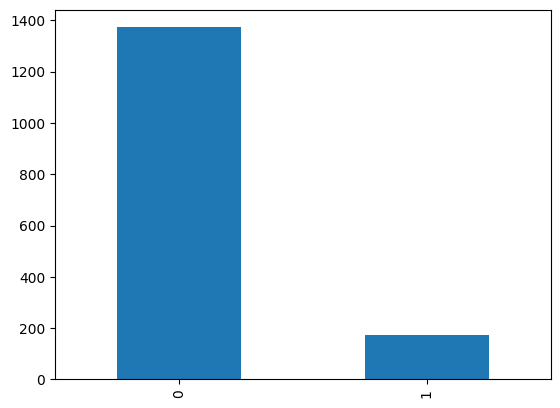

In [6]:
raw_merge.label.value_counts().plot(kind='bar')
#unbalanced data

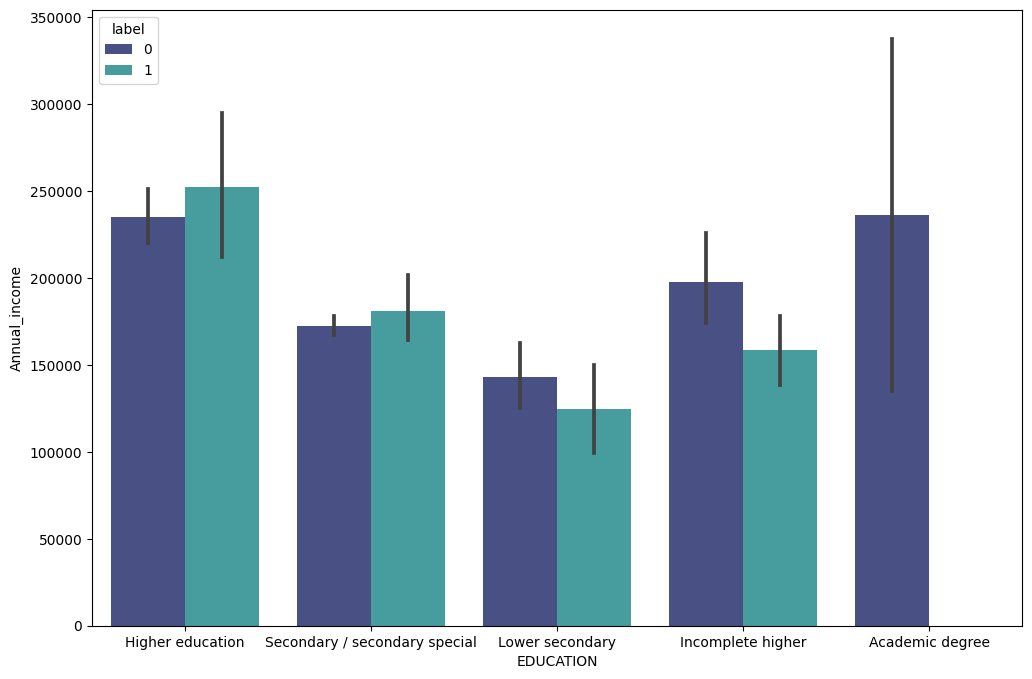

In [7]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(data = raw_merge, x='EDUCATION', y='Annual_income', hue='label', palette = 'mako')

* From the above plot it can be inferred that person having academic degree  did not get approval despite having higher annual income.
* It can also be inferred that some persons with secondary education have higher annual income than person having incomplete higher education.


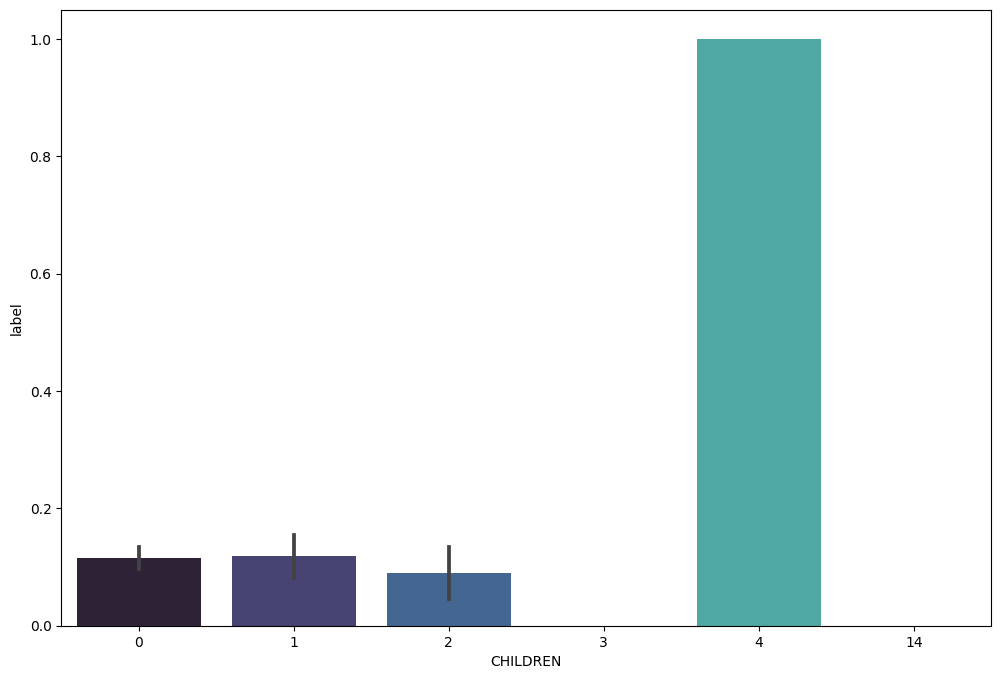

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(data = raw_merge, x='CHILDREN', y='label',  palette = 'mako')
# families with  children> 2  are getting more approvals

In [9]:
import plotly.express as px
fig = px.histogram(raw_merge, x="Annual_income", nbins=30, width=800, height=400,)
fig.show()
# it is right skewed
# many people have salary < 2 lacs

In [10]:
fig = px.box(raw_merge, x="label", y="Annual_income", color='label',   width=600, height=600)
fig.show()
# Avg income of people getting approvel is higher than that of people who have not 
# though many outliers are there , it would be better if we draw inferences after removing outliers

In [11]:
raw_merge = raw_merge.drop(['Type_Occupation'],axis=1)

Dropping the unncessary columns

In [12]:
raw_merge = raw_merge.drop(['Mobile_phone','Phone','EMAIL_ID'] , axis=1)

In [13]:
raw_merge =raw_merge.drop(['Work_Phone'],axis =1)
raw_merge

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,2,0


Pefroming Chi-Squared Test

In [14]:
merge_2 = raw_merge.copy()

In [15]:
merge_2['label']=merge_2['label'].astype('category')



1.   H0 = Independent
2.   Ha = Dependent




In [16]:
chi_gender = pd.crosstab(merge_2['GENDER'],merge_2['label'])
print(chi_gender)

label     0   1
GENDER         
F       878  95
M       493  75


In [17]:
from scipy.stats import chi2_contingency
# defining the table
stat , p ,dof ,expected = chi2_contingency(chi_gender)
p

0.04598448082256474



*   p value is less than 0.05 therefore Ho shall be rejected 
*   Gender and label are dependant



In [18]:
chi_car_owner = pd.crosstab(merge_2['Car_Owner'],merge_2['label'])
chi_car_owner

label,0,1
Car_Owner,,
N,816,108
Y,557,67


In [19]:
stat , p ,dof ,expected = chi2_contingency(chi_car_owner)
p

0.6185693269675412

 * p value is greater than 0.05 therefore we have failed to reject Ho
 * Car ownership and label are independant

In [20]:
#Property_Owner
chi_property_owner = pd.crosstab(merge_2['Propert_Owner'],merge_2['label'])
chi_property_owner

label,0,1
Propert_Owner,,
N,473,65
Y,900,110


In [21]:
stat , p ,dof ,expected = chi2_contingency(chi_property_owner)
p

0.5351095955412992

* p value is greater than 0.05 therefore we have failed to reject Ho
* Property ownership and label are independant

In [22]:
# Dropping the unncessary column
merge_3 = merge_2.drop(['Ind_ID','Propert_Owner','Car_Owner'],axis =1)
merge_3

,GENDER,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,label
0,M,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,2,1
1,F,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,1
2,F,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,2,1
3,F,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,1
4,F,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1543,F,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,2,0
1544,F,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0
1545,M,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,4,0
1546,M,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,2,0


## Encoding

*Following columns have more than 3 categories*

In [23]:
merge_3['Type_Income'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [24]:
#It would look obvious that Ordinal Encoding is the best option.
#But by observing the data it can be inferred that some people with incomplete higher education earn more than people with higher education
#Therefore Target encoding is the option 
merge_3['EDUCATION'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [25]:
merge_3['Marital_status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [26]:
merge_3['Housing_type'].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [27]:
merge_3['label']=merge_2['label'].astype('int')

In [28]:
merge_3['Encoded_Type_Income'] = merge_3.groupby('Type_Income')['label'].transform('mean')
merge_3['Encoded_Type_Income']

0       0.156134
1       0.136986
2       0.136986
3       0.136986
4       0.136986
          ...   
1543    0.136986
1544    0.136986
1545    0.096491
1546    0.096491
1547    0.096491
Name: Encoded_Type_Income, Length: 1548, dtype: float64

In [29]:
merge_3['Encoded_Education'] = merge_3.groupby('EDUCATION')['label'].transform('mean')
merge_3['Encoded_Education']

0       0.129108
1       0.129108
2       0.129108
3       0.129108
4       0.129108
          ...   
1543    0.129108
1544    0.073529
1545    0.129108
1546    0.105723
1547    0.129108
Name: Encoded_Education, Length: 1548, dtype: float64

In [30]:
merge_3['Encoded_Marital_status'] = merge_3.groupby('Marital_status')['label'].transform('mean')
merge_3['Encoded_Marital_status']

0       0.108675
1       0.108675
2       0.108675
3       0.108675
4       0.108675
          ...   
1543    0.108675
1544    0.154185
1545    0.108675
1546    0.039604
1547    0.108675
Name: Encoded_Marital_status, Length: 1548, dtype: float64

In [31]:
merge_3['Encoded_Housing_type'] = merge_3.groupby('Housing_type')['label'].transform('mean')
merge_3['Encoded_Housing_type']

0       0.105797
1       0.105797
2       0.105797
3       0.105797
4       0.105797
          ...   
1543    0.105797
1544    0.105797
1545    0.105797
1546    0.105797
1547    0.105797
Name: Encoded_Housing_type, Length: 1548, dtype: float64

In [32]:
merge_3

,GENDER,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,label,Encoded_Type_Income,Encoded_Education,Encoded_Marital_status,Encoded_Housing_type
0,M,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,2,1,0.156134,0.129108,0.108675,0.105797
1,F,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,1,0.136986,0.129108,0.108675,0.105797
2,F,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,2,1,0.136986,0.129108,0.108675,0.105797
3,F,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,1,0.136986,0.129108,0.108675,0.105797
4,F,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,1,0.136986,0.129108,0.108675,0.105797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,2,0,0.136986,0.129108,0.108675,0.105797
1544,F,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0.136986,0.073529,0.154185,0.105797
1545,M,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,4,0,0.096491,0.129108,0.108675,0.105797
1546,M,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,2,0,0.096491,0.105723,0.039604,0.105797


In [33]:
merge_4 = merge_3.copy()

In [34]:
merge_4=pd.get_dummies(merge_4,columns=['GENDER'])

In [35]:
merge_4 = merge_4.drop(['GENDER_F'],axis=1)

In [36]:
merge_4 = merge_4.drop(['Type_Income','EDUCATION','Marital_status','Housing_type'],axis=1)

In [37]:
merge_4.columns

Index(['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days',
       'Family_Members', 'label', 'Encoded_Type_Income', 'Encoded_Education',
       'Encoded_Marital_status', 'Encoded_Housing_type', 'GENDER_M'],
      dtype='object')

In [38]:
# Reordering the columns
order =['GENDER_M','CHILDREN','Annual_income','Birthday_count','Encoded_Type_Income','Encoded_Education', 'Encoded_Marital_status', 'Encoded_Housing_type','Employed_days', 'Family_Members', 'label']
merge_4 = merge_4[order]

In [39]:
merge_4

,GENDER_M,CHILDREN,Annual_income,Birthday_count,Encoded_Type_Income,Encoded_Education,Encoded_Marital_status,Encoded_Housing_type,Employed_days,Family_Members,label
0,1,0,180000.0,-18772.0,0.156134,0.129108,0.108675,0.105797,365243,2,1
1,0,0,315000.0,-13557.0,0.136986,0.129108,0.108675,0.105797,-586,2,1
2,0,0,315000.0,NaN,0.136986,0.129108,0.108675,0.105797,-586,2,1
3,0,0,NaN,-13557.0,0.136986,0.129108,0.108675,0.105797,-586,2,1
4,0,0,315000.0,-13557.0,0.136986,0.129108,0.108675,0.105797,-586,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,NaN,-11957.0,0.136986,0.129108,0.108675,0.105797,-2182,2,0
1544,0,0,225000.0,-10229.0,0.136986,0.073529,0.154185,0.105797,-1209,1,0
1545,1,2,180000.0,-13174.0,0.096491,0.129108,0.108675,0.105797,-2477,4,0
1546,1,0,270000.0,-15292.0,0.096491,0.105723,0.039604,0.105797,-645,2,0


## Feature Engineering and Imputation of Null Values

In [40]:
merge_5 = merge_4.copy()

In [41]:
merge_5['Birthday_count']=-(merge_5['Birthday_count'])//365

In [42]:
merge_5['Employed_days']=-(merge_5['Employed_days'])//365
merge_5['Employed_days'][merge_5['Employed_days']<0] = np.NaN

<ipython-input-42-c8f7918cf64f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
merge_6 = merge_5.copy()

In [44]:
merge_6['label'] = merge_6['label'].astype('category')

<Axes: >

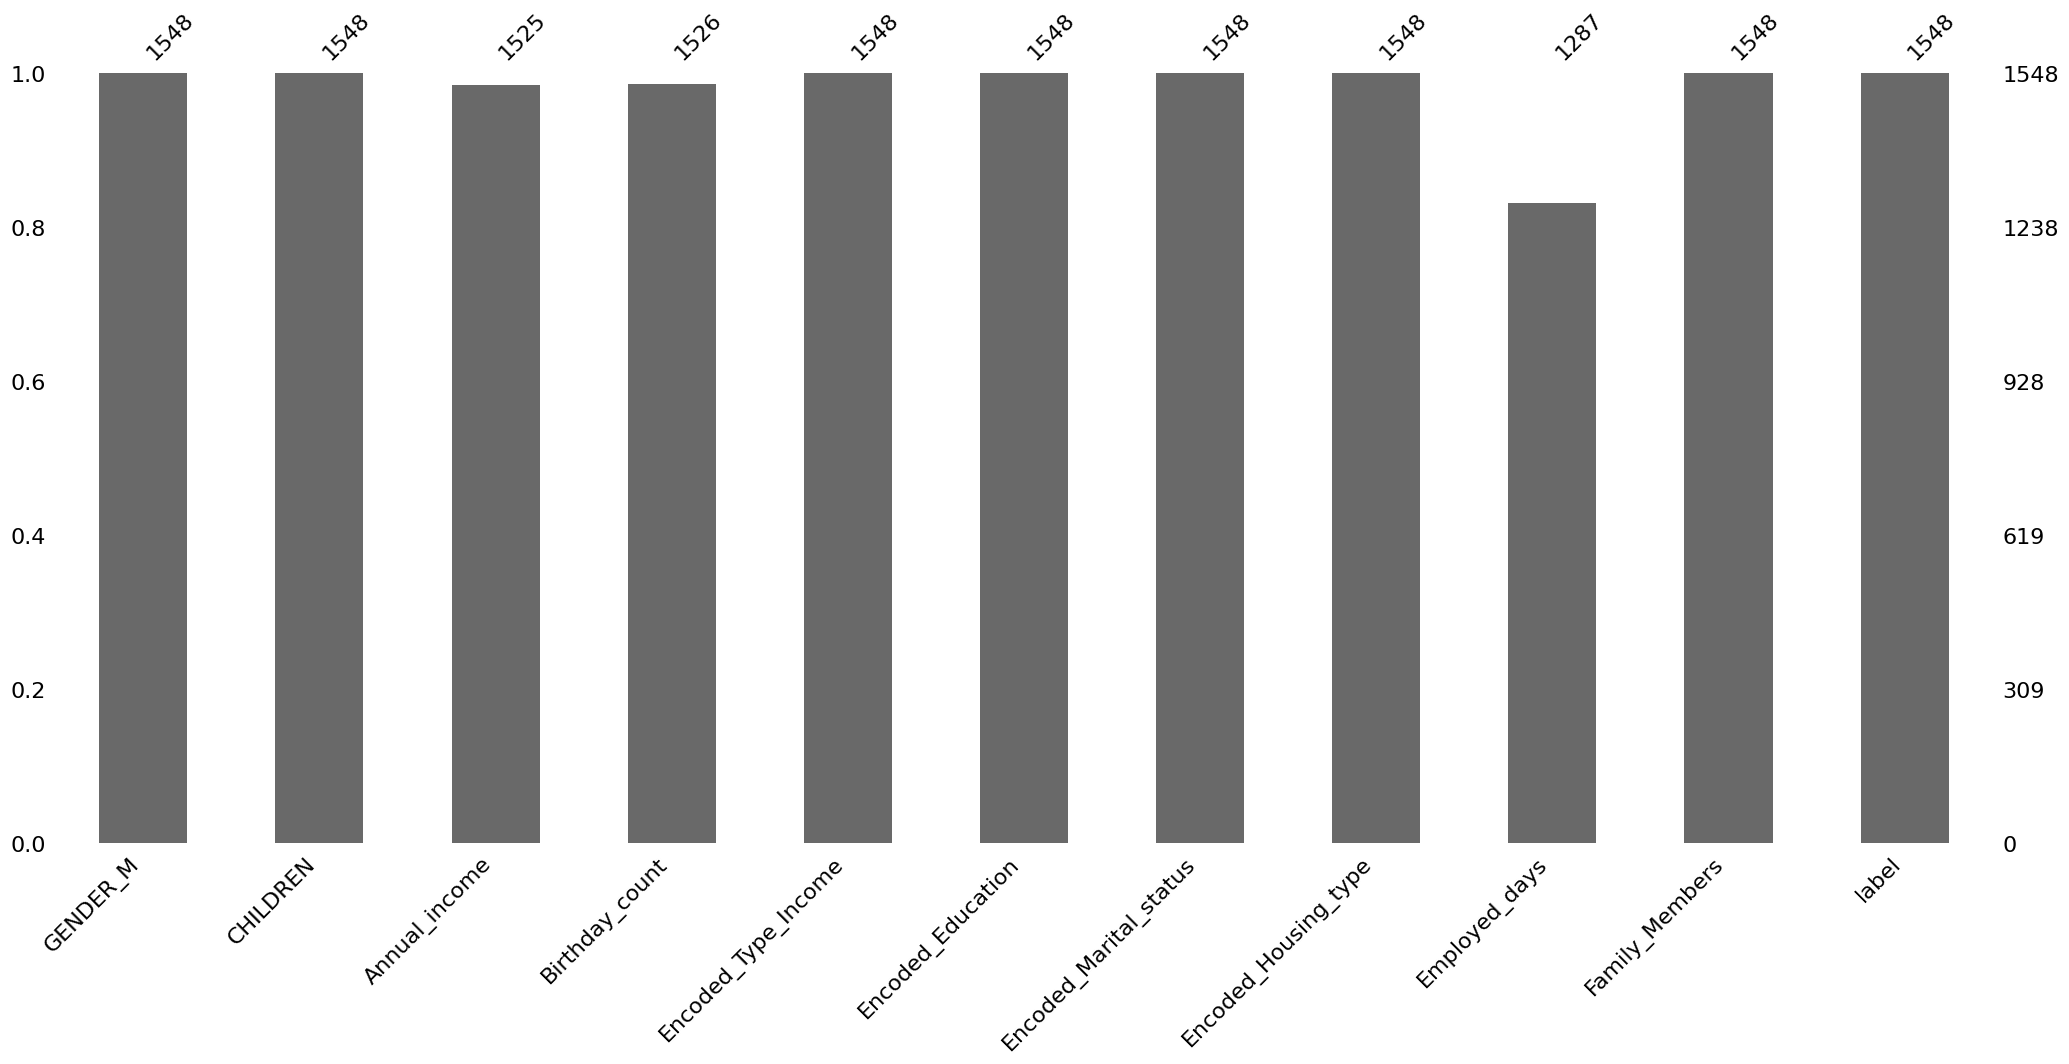

In [45]:
import missingno as msno
# creating bar plot to see the missing values
msno.bar(merge_6)

In [46]:
merge_7 = merge_6.copy()

In [47]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.3 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=c5f56c21717b26b40404301907590bf12efd3c8960128b0c4906112bfacacdbd
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=80445058e98e7b3f902256b3ba0449e71f589ea3002f4d1bae59f9feaf536fb3
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [48]:
from fancyimpute import KNN
knn_imputer = KNN()
merge_7_knn = merge_7.copy(deep=True)
merge_7_knn.iloc[:, :] = knn_imputer.fit_transform(merge_7_knn)

Imputing row 1/1548 with 1 missing, elapsed time: 0.310
Imputing row 101/1548 with 0 missing, elapsed time: 0.311
Imputing row 201/1548 with 1 missing, elapsed time: 0.312
Imputing row 301/1548 with 0 missing, elapsed time: 0.313
Imputing row 401/1548 with 0 missing, elapsed time: 0.314
Imputing row 501/1548 with 0 missing, elapsed time: 0.315
Imputing row 601/1548 with 0 missing, elapsed time: 0.315
Imputing row 701/1548 with 0 missing, elapsed time: 0.316
Imputing row 801/1548 with 0 missing, elapsed time: 0.317
Imputing row 901/1548 with 0 missing, elapsed time: 0.318
Imputing row 1001/1548 with 0 missing, elapsed time: 0.319
Imputing row 1101/1548 with 1 missing, elapsed time: 0.320
Imputing row 1201/1548 with 1 missing, elapsed time: 0.321
Imputing row 1301/1548 with 0 missing, elapsed time: 0.322
Imputing row 1401/1548 with 0 missing, elapsed time: 0.323
Imputing row 1501/1548 with 0 missing, elapsed time: 0.325


<ipython-input-48-9b01d3a9cd8c>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [49]:
merge_7_knn

,GENDER_M,CHILDREN,Annual_income,Birthday_count,Encoded_Type_Income,Encoded_Education,Encoded_Marital_status,Encoded_Housing_type,Employed_days,Family_Members,label
0,1.0,0.0,180000.000000,51.000000,0.156134,0.129108,0.108675,0.105797,6.145288,2.0,1.0
1,0.0,0.0,315000.000000,37.000000,0.136986,0.129108,0.108675,0.105797,1.000000,2.0,1.0
2,0.0,0.0,315000.000000,37.000001,0.136986,0.129108,0.108675,0.105797,1.000000,2.0,1.0
3,0.0,0.0,315000.009166,37.000000,0.136986,0.129108,0.108675,0.105797,1.000000,2.0,1.0
4,0.0,0.0,315000.000000,37.000000,0.136986,0.129108,0.108675,0.105797,1.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1543,0.0,0.0,127232.304738,32.000000,0.136986,0.129108,0.108675,0.105797,5.000000,2.0,0.0
1544,0.0,0.0,225000.000000,28.000000,0.136986,0.073529,0.154185,0.105797,3.000000,1.0,0.0
1545,1.0,2.0,180000.000000,36.000000,0.096491,0.129108,0.108675,0.105797,6.000000,4.0,0.0
1546,1.0,0.0,270000.000000,41.000000,0.096491,0.105723,0.039604,0.105797,1.000000,2.0,0.0


<Axes: >

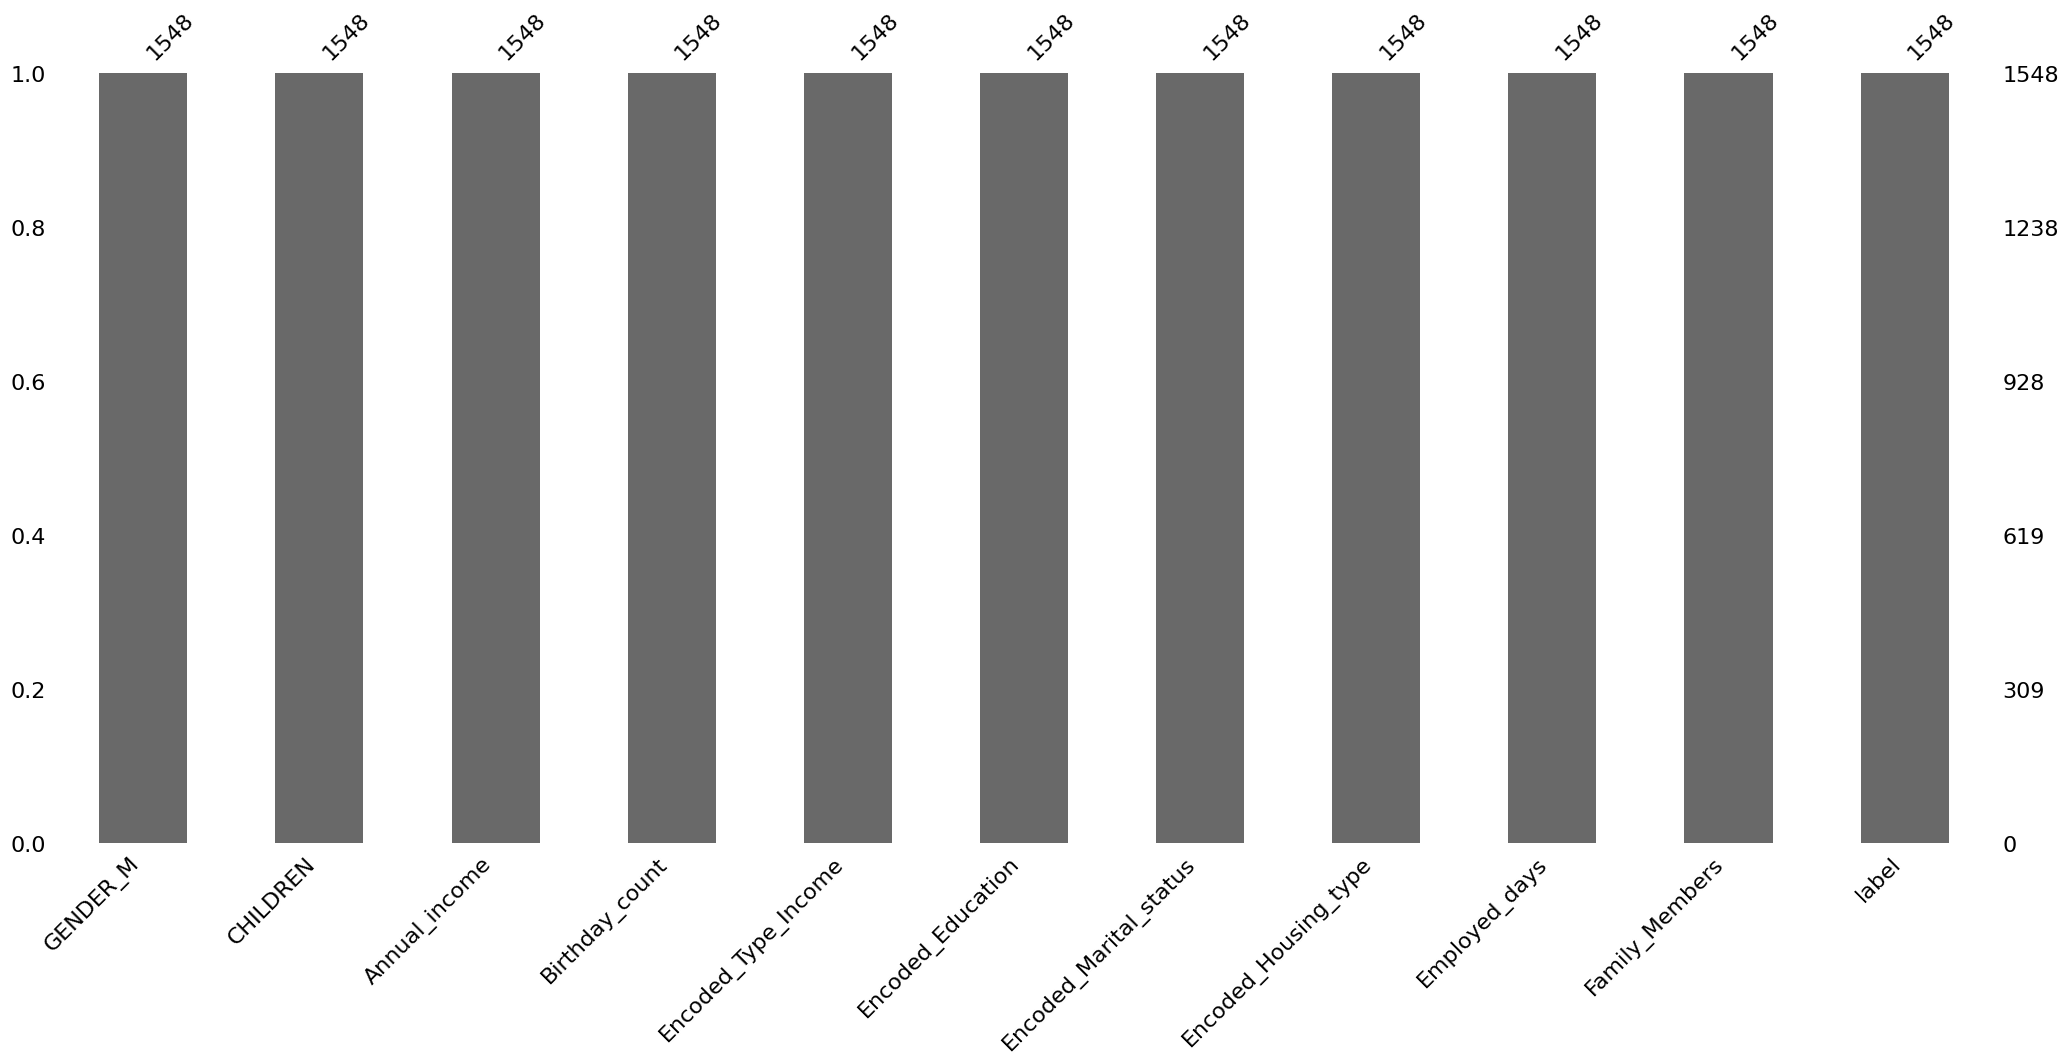

In [50]:
msno.bar(merge_7_knn)

In [51]:
merge_7_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GENDER_M                1548 non-null   float64
 1   CHILDREN                1548 non-null   float64
 2   Annual_income           1548 non-null   float64
 3   Birthday_count          1548 non-null   float64
 4   Encoded_Type_Income     1548 non-null   float64
 5   Encoded_Education       1548 non-null   float64
 6   Encoded_Marital_status  1548 non-null   float64
 7   Encoded_Housing_type    1548 non-null   float64
 8   Employed_days           1548 non-null   float64
 9   Family_Members          1548 non-null   float64
 10  label                   1548 non-null   float64
dtypes: float64(11)
memory usage: 145.1 KB


In [52]:
merge_7_knn['CHILDREN']=merge_7_knn['CHILDREN'].astype('int')
merge_7_knn['Family_Members']=merge_7_knn['Family_Members'].astype('int')
merge_7_knn['Birthday_count']=merge_7_knn['Birthday_count'].astype('int')
merge_7_knn['Employed_days']=merge_7_knn['Employed_days'].astype('int')
merge_7_knn['GENDER_M']=merge_7_knn['GENDER_M'].astype('category')
merge_7_knn['label']=merge_7_knn['label'].astype('category')

In [53]:
merge_7_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   GENDER_M                1548 non-null   category
 1   CHILDREN                1548 non-null   int64   
 2   Annual_income           1548 non-null   float64 
 3   Birthday_count          1548 non-null   int64   
 4   Encoded_Type_Income     1548 non-null   float64 
 5   Encoded_Education       1548 non-null   float64 
 6   Encoded_Marital_status  1548 non-null   float64 
 7   Encoded_Housing_type    1548 non-null   float64 
 8   Employed_days           1548 non-null   int64   
 9   Family_Members          1548 non-null   int64   
 10  label                   1548 non-null   category
dtypes: category(2), float64(5), int64(4)
memory usage: 124.2 KB


## Removing Outliers

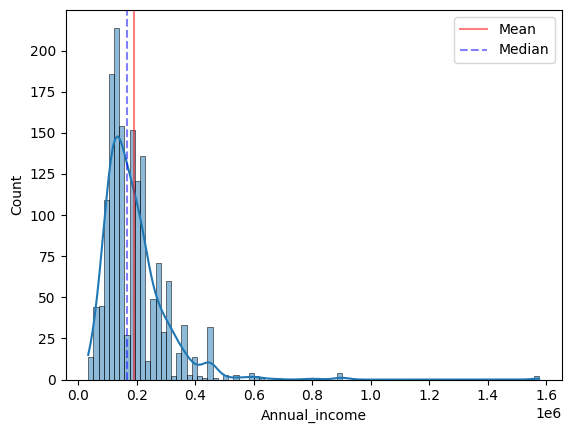

In [54]:
sns.histplot(data = merge_7_knn['Annual_income'], kde = True)
plt.axvline(x=merge_7_knn.Annual_income.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=merge_7_knn.Annual_income.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.show()
# It is right skewed , which shows there are chances of outliers

In [55]:
merge_7_knn['Annual_income'].describe()

count    1.548000e+03
mean     1.912824e+05
std      1.129644e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.665000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Annual_income, dtype: float64

In [56]:
Q1 = np.percentile(merge_7_knn['Annual_income'], 25, method = 'midpoint')
Q2 = np.percentile(merge_7_knn['Annual_income'], 50, method = 'midpoint')  
Q3 = np.percentile(merge_7_knn['Annual_income'], 75, method = 'midpoint')
print("Q1 =",Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 121500.0
Q2 = 166500.0
Q3 = 225000.0


In [57]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in merge_7_knn['Annual_income']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 103500.0
low_limit is -33750.0
up_limit is 380250.0
 outlier in the dataset is [450000.0, 450000.0, 450000.0, 472500.0, 540000.0, 540000.0, 450000.0, 391500.0, 391500.0, 391500.0, 675000.0, 390075.0779554831, 585000.0, 585000.0, 449999.1628618542, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 445500.0, 1575000.0, 1575000.0, 900000.0, 450000.0, 450000.0, 423000.0, 450000.0, 540000.0, 450000.0, 495000.0, 612000.0, 427500.0, 612000.0, 450000.0, 787500.0, 450000.0, 594000.0, 585000.0, 495000.0, 387000.0, 450000.0, 900000.0, 382500.0, 450000.0, 900000.0, 405000.0, 405000.0, 445500.0, 450000.0, 450000.0, 450000.0, 450000.0, 405000.0, 900000.0, 630000.0, 450000.0, 418500.0, 450000.0, 405000.0, 405000.0, 405000.0, 495000.0, 450000.0, 387000.0, 810000.0, 391500.0, 405000.0, 450000.0, 405000.0, 450000.0, 450000.0, 405000.0, 450000.0]


In [58]:
merge_7_knn.drop(merge_7_knn[ (merge_7_knn.Annual_income > up_lim) | (merge_7_knn.Annual_income < low_lim) ].index , inplace=True)

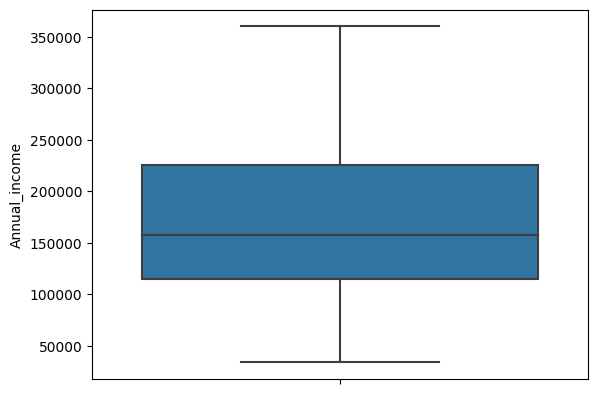

In [59]:
sns.boxplot(y=merge_7_knn['Annual_income'])
plt.show()

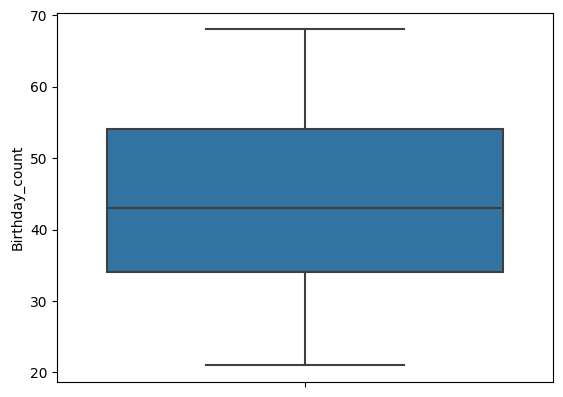

In [60]:
sns.boxplot(y=merge_7_knn['Birthday_count'])
plt.show()
# no outliers

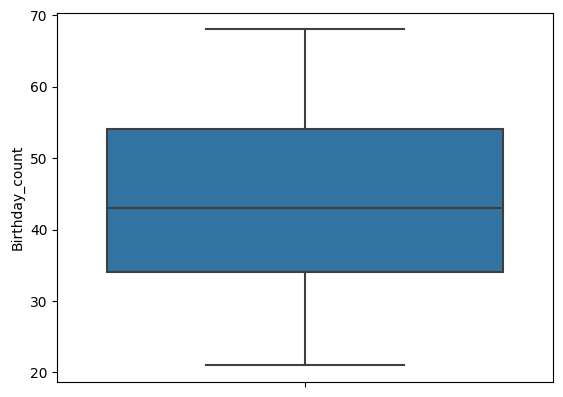

In [61]:
sns.boxplot(y=merge_7_knn['Birthday_count'])
plt.show()
# no outliers

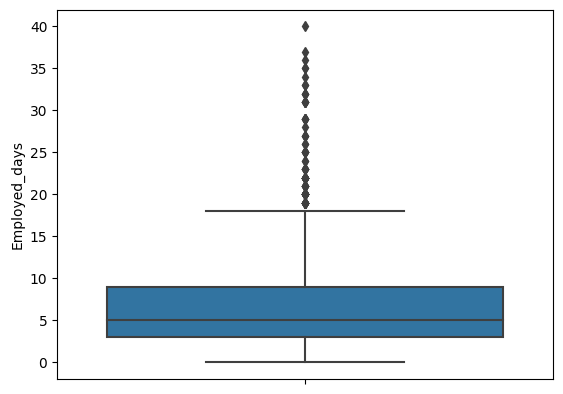

In [62]:
sns.boxplot(y=merge_7_knn['Employed_days'])
plt.show()

In [63]:
Q1 = np.percentile(merge_7_knn['Employed_days'], 25, method = 'midpoint')
Q2 = np.percentile(merge_7_knn['Employed_days'], 50, method = 'midpoint')  
Q3 = np.percentile(merge_7_knn['Employed_days'], 75, method = 'midpoint')
print("Q1 =",Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 3.0
Q2 = 5.0
Q3 = 9.0


In [64]:
# the employed days are not actually days but years becuase in feature engineering, we have divided this column by 365
# removing outliers might cause data loss therefore clipping the outliers is a would be a better choice
def iqr_capping(df , cols , factor ):
  for col in cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)

    iqr = q3-q1
    upper_whisker = q3+(factor*iqr)
    lower_whisker = q1-(factor*iqr)
    df[col]= np.where(df[col]>upper_whisker , upper_whisker,
             np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [65]:
feature =['Employed_days']

In [66]:
iqr_capping(merge_7_knn , feature , 3 )

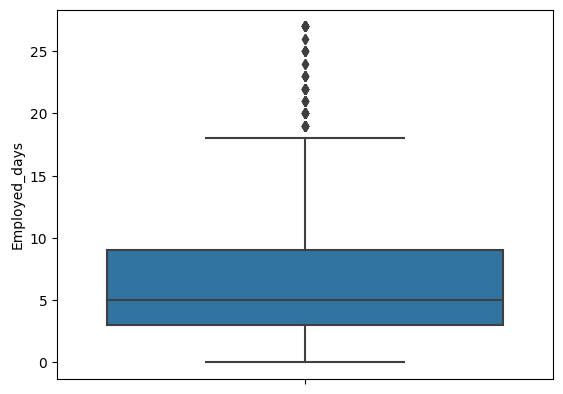

In [67]:
sns.boxplot(y=merge_7_knn['Employed_days'])
plt.show()

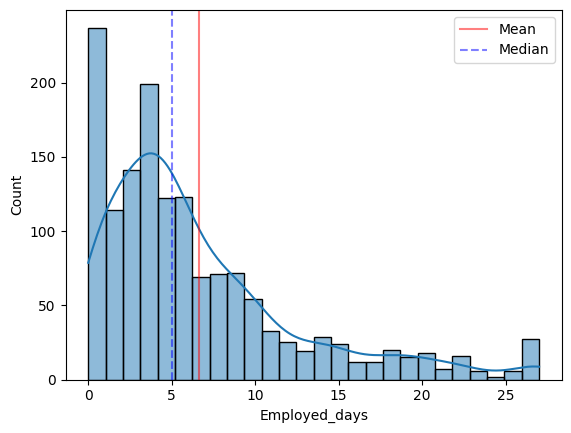

In [68]:
sns.histplot(data = merge_7_knn['Employed_days'], kde = True)
plt.axvline(x=merge_7_knn.Employed_days.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=merge_7_knn.Employed_days.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.show()


<Axes: >

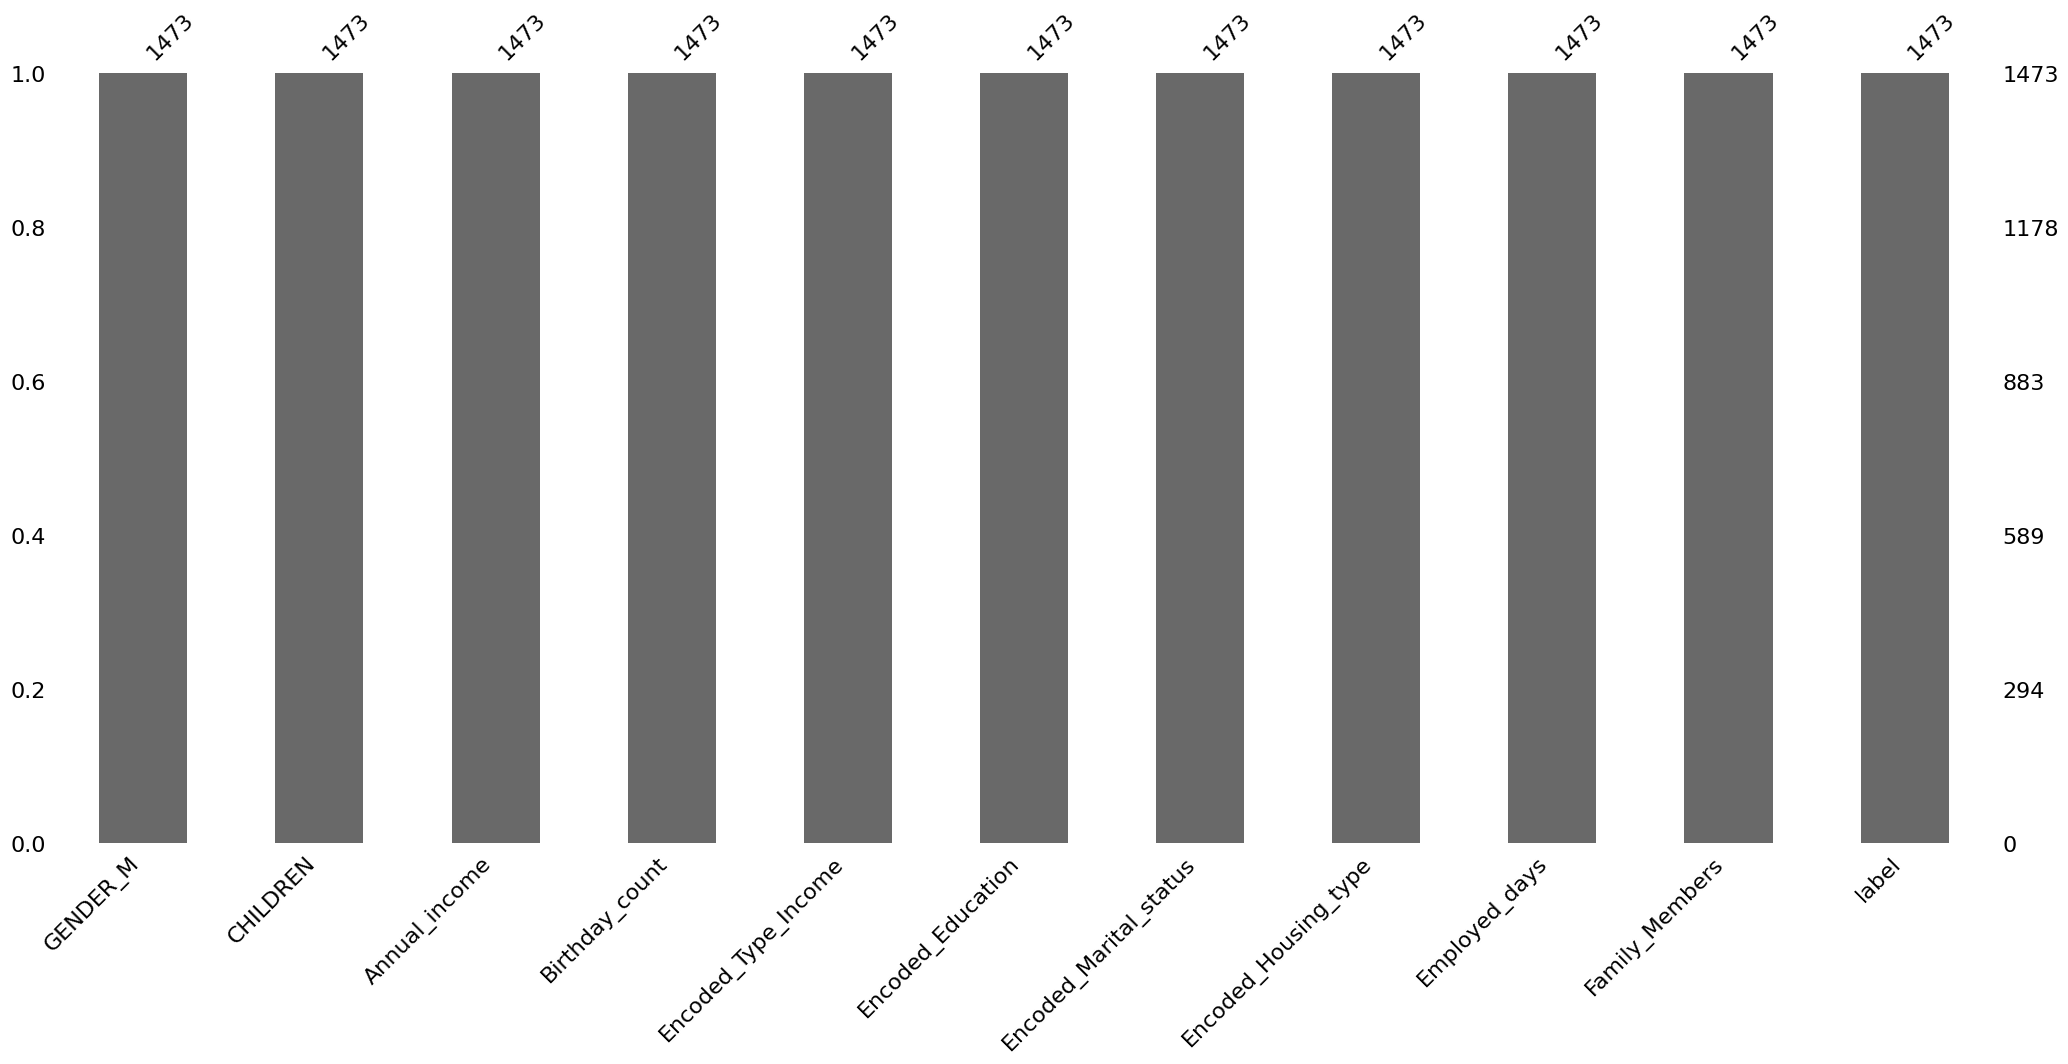

In [69]:
msno.bar(merge_7_knn)

In [70]:
fig = px.box(merge_7_knn, x="label", y="Annual_income", color='label',   width=600, height=600)
fig.show()
# the median income of people getting approval is approximately same as that people who are not getting the approval

In [71]:
fig = px.box(merge_7_knn, x="label", y="Birthday_count", color='label',   width=600, height=600)
fig.show()
# people who are getting approval have higher median age 

In [72]:
fig = px.box(merge_7_knn, x="label", y="Employed_days", color='label',   width=600, height=600)
fig.show()
# people who are getting approval have lower median employed years

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

  
# the independent variables set
X1 = merge_7_knn[['GENDER_M', 'Employed_days', 'Annual_income','Birthday_count','CHILDREN','Family_Members','Encoded_Type_Income','Encoded_Education','Encoded_Marital_status','Encoded_Housing_type']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
  
print(vif_data)

                  feature        VIF
0                GENDER_M   1.739410
1           Employed_days   2.563564
2           Annual_income   7.149025
3          Birthday_count  19.973867
4                CHILDREN   6.082684
5          Family_Members  25.956014
6     Encoded_Type_Income  18.702571
7       Encoded_Education  19.788332
8  Encoded_Marital_status  16.645670
9    Encoded_Housing_type   7.938098


VIF > 5 considered as high multicolinearity.Many such columns are present inside dataset hence logistic regression can not be used.


## ANOVA for numerical columns

* Ho: Both are independant
* Ha: Both are dependant

In [74]:
from scipy.stats import f_oneway

In [75]:
yes = merge_7_knn.loc[merge_7_knn['label'] == 1]['Annual_income'].values
no = merge_7_knn.loc[merge_7_knn['label'] == 0]['Annual_income'].values
f_oneway(yes,no)


F_onewayResult(statistic=2.1160338453921805, pvalue=0.14597693076421275)

*p-value is greater than 0.05 hence we failed to reject null hypothesis*

In [76]:
yes1 = merge_7_knn.loc[merge_7_knn['label'] == 1]['Employed_days'].values
no1 = merge_7_knn.loc[merge_7_knn['label'] == 0]['Employed_days'].values
f_oneway(yes1,no1)

F_onewayResult(statistic=8.232468528962082, pvalue=0.004173532271930262)

*p-value is less than 0.05 hence we reject the null hypothesis*

In [77]:
yes2 = merge_7_knn.loc[merge_7_knn['label'] == 1]['Birthday_count'].values
no2 = merge_7_knn.loc[merge_7_knn['label'] == 0]['Birthday_count'].values
f_oneway(yes2,no2)

F_onewayResult(statistic=5.471003067954809, pvalue=0.01946779670580801)

*p_value is less than 0.05 hence we reject the null hypothesis*

## Feature Scaling

In [78]:
merge_8 = merge_7_knn.copy()

In [79]:
merge_9 = merge_7_knn.copy()

In [80]:
merge_9 = merge_9.drop(['label'],axis=1)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data = scaler.fit_transform(merge_9)
std_data = pd.DataFrame(std_data , columns=merge_9.columns)
std_data.describe().round(3)

,GENDER_M,CHILDREN,Annual_income,Birthday_count,Encoded_Type_Income,Encoded_Education,Encoded_Marital_status,Encoded_Housing_type,Employed_days,Family_Members
count,1473.000,1473.000,1473.000,1473.000,1473.000,1473.000,1473.000,1473.000,1473.000,1473.000
mean,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.740,-0.515,-1.959,-1.947,-2.063,-4.545,-2.796,-1.197,-1.117,-1.219
25%,-0.740,-0.515,-0.828,-0.830,-0.551,-0.283,-0.152,-0.163,-0.614,-0.164
50%,-0.740,-0.515,-0.235,-0.057,-0.551,-0.283,-0.152,-0.163,-0.278,-0.164
75%,1.352,0.767,0.705,0.887,0.816,0.659,-0.152,-0.163,0.393,0.891
max,1.352,17.434,2.585,2.090,1.463,6.972,1.589,6.865,3.411,13.551


## MODEL BUILDING 

#*Decision Tree*

In [82]:
X = merge_9
y = merge_7_knn['label']

In [83]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [84]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=102) # 70% training and 30% test

In [85]:
# Create Decision Tree classifer object
#Fitting the decision tree with default hyperparameters, apart from
#max_depth which is 5 so that we can plot and read the tree
classification = DecisionTreeClassifier(criterion="gini", max_depth = 5)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [86]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9059 
Decision tree testing set accuracy: 0.8982 


In [87]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       397
         1.0       0.50      0.09      0.15        45

    accuracy                           0.90       442
   macro avg       0.70      0.54      0.55       442
weighted avg       0.86      0.90      0.86       442



* Average f1-score , precision, recall are decent here.
* The accuracy for training and test dataset is also good.





Hyper-Parameter Tuning

In [88]:
#GridSearchCV to find optimal parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
param_grid = {
    'max_depth':range(5,15,5),
    'min_samples_leaf':range(50,150,50),
    'min_samples_split':range(50,150,50),
    'criterion': ["entropy","gini"]
}
n_folds = 5
#Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree , param_grid = param_grid,
                           cv=n_folds, verbose=1)

# fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [89]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003249,0.000740,0.002259,0.000427,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.89372,0.893204,0.893204,0.893204,0.893204,0.893307,0.000206,1
1,0.002500,0.000040,0.001627,0.000034,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.89372,0.893204,0.893204,0.893204,0.893204,0.893307,0.000206,1
2,0.002383,0.000102,0.001720,0.000129,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.89372,0.893204,0.893204,0.893204,0.893204,0.893307,0.000206,1
3,0.002558,0.000072,0.001733,0.000076,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.89372,0.893204,0.893204,0.893204,0.893204,0.893307,0.000206,1
4,0.002688,0.000035,0.001737,0.000049,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.89372,0.893204,0.893204,0.893204,0.893204,0.893307,0.000206,1
5,0.002701,0.000120,0.001707,0.000127,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.89372,0.893204,0.893204,0.893204,0.893204,0.893307,0.000206,1
6,0.002768,0.000474,0.002287,0.001140,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.89372,0.893204,0.893204,0.893204,0.893204,0.893307,0.000206,1
7,0.003181,0.000951,0.002342,0.000949,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.89372,0.893204,0.893204,0.893204,0.893204,0.893307,0.000206,1
8,0.002453,0.000076,0.001592,0.000108,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.89372,0.893204,0.893204,0.893204,0.893204,0.893307,0.000206,1
9,0.002357,0.000044,0.001485,0.000026,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.89372,0.893204,0.893204,0.893204,0.893204,0.893307,0.000206,1


In [90]:
print('best accuracy:',grid_search.best_score_)
print(grid_search.best_estimator_) # it will tell me for what value of which parameter I get best accuracy
# these parameters are 
#criterion='entropy', max_depth=5, min_samples_leaf=50,
# min_samples_split=50

best accuracy: 0.8933070681487735
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [91]:
clf_entropy = DecisionTreeClassifier(max_depth=3,             
                                     min_samples_leaf=50,
                                     criterion='entropy') # I have put maximum depth to 3 to avoid complexity in structure of Decision Tree
clf_entropy.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=50)

In [92]:
clf_entropy.score(X_test,y_test)

0.8981900452488688

## Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [94]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 559 to 391
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   GENDER_M                442 non-null    category
 1   CHILDREN                442 non-null    int64   
 2   Annual_income           442 non-null    float64 
 3   Birthday_count          442 non-null    int64   
 4   Encoded_Type_Income     442 non-null    float64 
 5   Encoded_Education       442 non-null    float64 
 6   Encoded_Marital_status  442 non-null    float64 
 7   Encoded_Housing_type    442 non-null    float64 
 8   Employed_days           442 non-null    float64 
 9   Family_Members          442 non-null    int64   
dtypes: category(1), float64(6), int64(3)
memory usage: 35.1 KB


In [95]:
y_pred_class = logreg.predict(X_test)

In [96]:
# Calculate accuracy 
### accuracy using accuracy_score
from sklearn import metrics
print(round(metrics.accuracy_score(y_test, y_pred_class), 2))

0.9


# Random Forest

In [97]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
rfc= RandomForestClassifier(n_estimators= 10, criterion="entropy")   # n_estimators = no. of trees in the forest
rfc.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [98]:
#Predicting the test set result  
predictions= rfc.predict(X_test) 

In [99]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix ,classification_report , accuracy_score 
cm= confusion_matrix(y_test, predictions)
print(cm)  

[[395   2]
 [ 31  14]]


In [100]:
print(accuracy_score(y_test,predictions))

0.9253393665158371


Hyperparameter Tuning

In [101]:
#GridSearchCV to find optimal parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
param_grid = {
    'max_depth':[4,8,10],
    'min_samples_leaf':range(100,400,200),
    'min_samples_split':range(200,500,200),
    'n_estimators':[100,200,300],
    'max_features': [5,10]
}

#Instantiate the grid search model
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf , param_grid = param_grid,
                           cv=3,n_jobs=-1, verbose=1)

# fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [102]:
print('We can get accuracy of ',grid_search.best_score_,'using',grid_search.best_estimator_)

We can get accuracy of  0.8933091509028861 using RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=100,
                       min_samples_split=200)


In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap=True,
                           max_depth=4,
                           min_samples_leaf=100,
                           max_features=5,
                           min_samples_split=200)

In [104]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=100,
                       min_samples_split=200)

In [105]:
predictions=rfc.predict(X_test)

In [106]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       397
         1.0       0.00      0.00      0.00        45

    accuracy                           0.90       442
   macro avg       0.45      0.50      0.47       442
weighted avg       0.81      0.90      0.85       442



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [107]:
print(accuracy_score(y_test,predictions)) # accuracy of the model as per parameters I have got after hyperparameter tuning

0.8981900452488688


# KNN Algorithm

Label data is imbalanced therefore using the SMOTE algorithm for handling

In [123]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=102) # 70% training and 30% test

In [124]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt=SMOTE()
X_sm , y_sm = smt.fit_resample(X_train , y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0.0: 921, 1.0: 921})


In [125]:
X_sm.shape,y_sm.shape

((1842, 10), (1842,))

In [126]:
#import class you plan to use
from sklearn.neighbors import KNeighborsClassifier
NNH =KNeighborsClassifier(n_neighbors = 5 ,weights = 'distance')

In [128]:
from fancyimpute import KNN
knn_imputer = KNN()
X_sm_1 = X_sm.copy(deep=True)
X_sm_1.iloc[:, :] = knn_imputer.fit_transform(X_sm_1)

Imputing row 1/1842 with 0 missing, elapsed time: 0.562
Imputing row 101/1842 with 0 missing, elapsed time: 0.563
Imputing row 201/1842 with 0 missing, elapsed time: 0.564
Imputing row 301/1842 with 0 missing, elapsed time: 0.565
Imputing row 401/1842 with 0 missing, elapsed time: 0.566
Imputing row 501/1842 with 0 missing, elapsed time: 0.567
Imputing row 601/1842 with 0 missing, elapsed time: 0.567
Imputing row 701/1842 with 0 missing, elapsed time: 0.568
Imputing row 801/1842 with 0 missing, elapsed time: 0.569
Imputing row 901/1842 with 0 missing, elapsed time: 0.570
Imputing row 1001/1842 with 0 missing, elapsed time: 0.571
Imputing row 1101/1842 with 0 missing, elapsed time: 0.573
Imputing row 1201/1842 with 1 missing, elapsed time: 0.575
Imputing row 1301/1842 with 1 missing, elapsed time: 0.577
Imputing row 1401/1842 with 1 missing, elapsed time: 0.581
Imputing row 1501/1842 with 1 missing, elapsed time: 0.585
Imputing row 1601/1842 with 0 missing, elapsed time: 0.588
Imputing 

<ipython-input-128-71f9727e194e>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [129]:
NNH.fit(X_sm_1 , y_sm)

KNeighborsClassifier(weights='distance')

In [131]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test , y_test)

0.746606334841629

In [ ]:
#Creating the Confusion matrix  , accuracy score and classification report.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [132]:
cm= confusion_matrix(y_test,predicted_labels ) 
print(cm)
score=accuracy_score(y_test, predicted_labels)
print(score)

[[306  91]
 [ 21  24]]
0.746606334841629


 Hyperparameter Tuning

In [133]:
scores = []
for k in range(1,50):
  NNH = KNeighborsClassifier(n_neighbors = k ,weights = 'distance')
  NNH.fit(X_sm_1 , y_sm)
  scores.append(NNH.score(X_test,y_test))

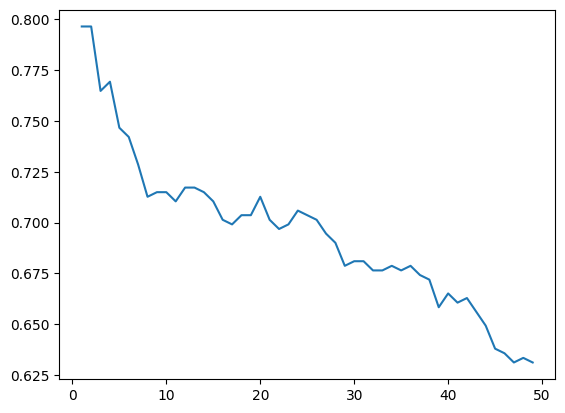

In [135]:
plt.plot(range(1,50),scores)
plt.show()
# appearently k<=5 values are giving best scores

In [137]:
#import class you plan to use
from sklearn.neighbors import KNeighborsClassifier
NNH =KNeighborsClassifier(n_neighbors = 4 ,weights = 'distance')

In [139]:
NNH.fit(X_sm_1 , y_sm)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [140]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test , y_test) 

0.7692307692307693

performance of model has enhanced by 2%